## Analysis of backbone torsion angles

* This tutorial discuss the analyses that can be performed using the [dnaMD Python module](http://do-x3dna.readthedocs.io/en/latest/api_summary.html) included in the _do\_x3dna_ package. The tutorial is prepared using [Jupyter Notebook](https://jupyter.org/) and this notebook tutorial file could be downloaded from this [link](http://rjdkmr.github.io/do_x3dna/tut_notebook/base_pairs_tutorial.ipynb).


* Download the input files that are used in the tutorial from this [link](http://rjdkmr.github.io/do_x3dna/tutorial_data.tar.gz).


* Two following input files are required in this tutorial
    * ``BackBoneCHiDihedrals_cdna.dat`` (``do_x3dna`` output from the trajectory, which contains the DNA bound with the protein)
    * ``BackBoneCHiDihedrals_odna.dat`` (``do_x3dna`` output from the trajectory, which only contains the free DNA)
    
    These two file **should be** present inside tutorial_data of the current/present working directory.
    
    
* The Python APIs **should be** only used when ``do_x3dna`` is executed with ``-ref`` option.


* Detailed documentation is provided [here](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html).


### Importing Python Modules

* [numpy](http://www.numpy.org/): Required for the calculations involving large arrays


* [matplotlib](http://matplotlib.org/): Required to plot the results


* [dnaMD](http://do-x3dna.readthedocs.io/en/latest/api_summary.html): Python module to analyze DNA/RNA structures from the do_x3dna ouput files.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import dnaMD

%matplotlib inline

### Initializing DNA object and storing data to it

* [DNA object](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA) is initialized by using the total number of base-pairs


* For each nucleotide, [six backbone torision angles](http://do-x3dna.readthedocs.io/en/latest/_images/backbone_torsions.png) ($\alpha$, $\beta$, $\gamma$, $\delta$, $\epsilon$ and $\zeta$) including $\chi$ can be calulated.


* These torsion angles of both strands can be read and stored in DNA object from the input file using function [set_backbone_dihedrals(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.set_backbone_dihedrals).

* To speed up processing and analysis, data can be stored in a HDF5 file by including HDF5 file name as a argument during initialization. Same file can be used to store and retrieve all other parameters.

In [2]:
## Initialization
pdna = dnaMD.DNA(60)     #Initialization for 60 base-pairs DNA bound with the protein
fdna = dnaMD.DNA(60)     #Initialization for 60 base-pairs free DNA

## If HDF5 file is used to store/save data use these:
# pdna = dnaMD.DNA(60, filename='cdna.h5')     #Initialization for 60 base-pairs DNA bound with the protein
# fdna = dnaMD.DNA(60, filename='odna.h5')     #Initialization for 60 base-pairs free DNA

## Loading data from input files in respective DNA object
# parameters = 'All'
# will read and store alpha, beta, gamma, delta, epsilon, zeta and chi dihedrals of both strands
pdna.set_backbone_dihedrals('tutorial_data/BackBoneCHiDihedrals_cdna.dat', bp=[2, 59], parameters='All', bp_range=True)
fdna.set_backbone_dihedrals('tutorial_data/BackBoneCHiDihedrals_odna.dat', bp=[2, 59], parameters='All', bp_range=True)


Reading file : tutorial_data/BackBoneCHiDihedrals_cdna.dat
Reading frame 1000
Finishid reading.... Total number of frame read =  1001

Reading file : tutorial_data/BackBoneCHiDihedrals_odna.dat
Reading frame 1000
Finishid reading.... Total number of frame read =  1001


### Backbone Torsion angles as a function of time (manually)

* A specific type of torsion angle of a nucleotide/s can be extracted from the DNA obejct using function [dnaMD.DNA.get_parameters(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.get_parameters).


* The extracted angles can be plotted as a function of time


* The extracted angles (average) of a strand for the DNA segment can be plotted as a function of time


Following example shows **alpha**, $\alpha$ of first strand vs **Time** plots. These example also shows that how to extract the parameters value from the DNA object. Other properties could be extracted and plotted using similar steps.  


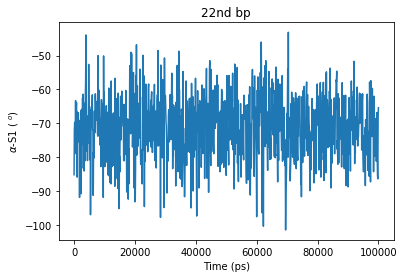

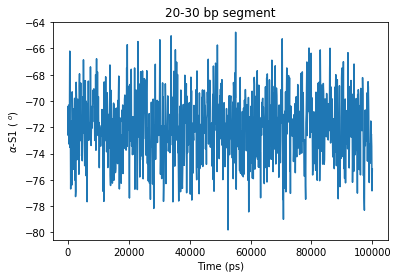

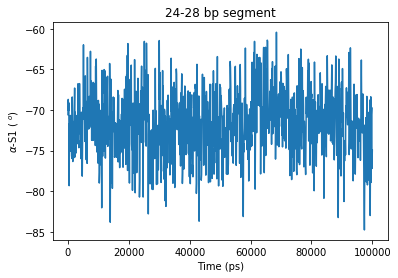

In [3]:
# Extracting "alpha" of first strand of 20 to 30 base-steps
alpha_S1, bp_idx = fdna.get_parameters('alpha S1',[20,30], bp_range=True)

# SI-alpha vs Time for 22nd base-pair
plt.title('22nd bp')
plt.plot(pdna.time, alpha_S1[2])      # index is 2 for 22nd base-step: (20 + 2)
plt.xlabel('Time (ps)')
plt.ylabel(r'$\alpha$-S1 ( $^o$)')
plt.show()

# Average SI-alpha vs Time for segment 20-30 base-pairs
avg_alpha_S1 = np.mean(alpha_S1, axis=0)     # Calculation of mean using mean function of numpy
plt.title('20-30 bp segment')
plt.plot(pdna.time, avg_alpha_S1)
plt.xlabel('Time (ps)')
plt.ylabel(r'$\alpha$-S1 ( $^o$)')
plt.show()

# Average SI-alpha vs Time for segment 24-28 base-step
# index of 24th base-step is 4 (20 + 4). index of 28th base-step is 8 (20 + 8)
avg_alpha_S1 = np.mean(alpha_S1[4:8], axis=0)     
plt.title('24-28 bp segment')
plt.plot(pdna.time, avg_alpha_S1)
plt.xlabel('Time (ps)')
plt.ylabel(r'$\alpha$-S1 ( $^o$)')
plt.show()

### Backbone torsion angles as a function of time (using provided functions)

Above examples show the method to extract the values from the DNA object. However, [dnaMD.DNA.time_vs_parameter(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.time_vs_parameter) function could be use to get torsion angle as a function of time for the given nucleotides or strand of the DNA segment


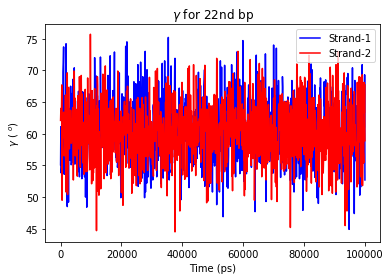

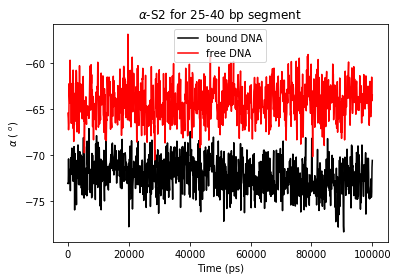

In [4]:
# S1-gamma and S2-gamma vs Time for 22nd bp
plt.title(r'$\gamma$ for 22nd bp')
time, S1 = fdna.time_vs_parameter('gamma S1', [22])
time, S2 = fdna.time_vs_parameter('gamma S2', [22])
plt.plot(time, S1, c='b', label='Strand-1')
plt.plot(time, S2, c='r', label='Strand-2')
plt.xlabel('Time (ps)')
plt.ylabel('$\gamma$ ( $^o$)')
plt.legend()
plt.show()

# alpha-S2 vs Time for 25-40 bp segment
plt.title(r'$\alpha$-S2 for 25-40 bp segment')
# Bound DNA
# Assume that the torsion angle a given segment is average over the nucelotides
time, value = pdna.time_vs_parameter('alpha S2', [25, 40], merge=True, merge_method='mean')
plt.plot(time, value, label='bound DNA', c='k')     # balck color => bound DNA
# Free DNA
time, value = fdna.time_vs_parameter('alpha S2', [25, 40], merge=True, merge_method='mean')
plt.plot(time, value, label='free DNA', c='r')    # red color => free DNA

plt.xlabel('Time (ps)')
plt.ylabel(r'$\alpha$ ( $^o$)')
plt.legend()
plt.show()

### Backbone torsional angles wheel of nucleotides/DNA-segment

* Angle wheel (Polar plot) of backbone torsion angles is a compat way to show the conformational flcutuations of backbone dynamics.


* Below is a defnition of method, which can be use to plot angles wheel for set of angle types.


In [5]:
def plot_angle_wheel(angles, colormap, color_res = 20, bin_size=2, ax=None, cb_pad=0.2, cb_shrink=0.75):
    """ Plot torsion wheel for given number of angles
        
        Arguments:
            
            angles (2D array): of shape (type,numbers)
            
            colormap (string): name of colormap
            
            color_res (int) : number of color-bins in colormap
            
            bin_size (int) : size of bin in Degree for calculation of histogram
            
            axis  (matplotlib axis): matplotlib axis instance. If (ax != None), colorbar instance will be returned.
            
            cb_pad (float): Gap between wheel-plot and colorbar
            
            cb_shrink (float): To increase or decrease size of colorbar
            
            
        Return:
        
            None : If ax=None
            
            or
            
            colorbar (matplotlib colorbar): if (ax != None) matplotlib colorbar instance. 
                                            This can be used to modify properties of color-bar
        
    """
        
    angles = np.asarray(angles) 
    
    # Number of angle types to plot
    nangle = angles.shape[0]
    
    # Number of input angles for each angle type
    nframe = angles.shape[1]
    
    angle_hist = []
        
    # Creating reference array of angle for histogram 
    hist_idx = np.arange(0, 360, bin_size, dtype=float)
    
    # Initializing histogram array over 360 Deg using bin-size
    for i in range(nangle):
        angle_hist.append(np.zeros(hist_idx.shape[0]))
    angle_hist = np.asarray(angle_hist)
        
    #### Calculating histogram ###
    for i in range(len(angles)):
        for j in range(len(angles[i])):
            
            # Converting angle of negative direction to postive direction
            if angles[i][j]<0:
                tmp_theta = 360 + angles[i][j]
            else:
                tmp_theta = angles[i][j]
            
            # Finding index in reference array for angle (index of nearest value)
            idx = (np.abs(hist_idx-tmp_theta)).argmin()
            
            # Updating angle histogram
            angle_hist[i][idx] += 1
        
        # Calculating fraction/precentage
        angle_hist[i] = np.divide(angle_hist[i],nframe)

    # minimum and maximum value
    min_max = [0.0, np.amax(angle_hist)]
        
    # Creating COLORMAP. To change colormap, see this link: 
    # (http://matplotlib.org/examples/color/colormaps_reference.html)
    # Creating array for color-range
    crange = np.linspace(0, min_max[1], color_res)
    
    # Creating array of color; 
    # To automate colormap inside a method, 
    # Following is equivalent to: color = plt.cm.colormap(crange); 
    # where colormap could be any type of maps that are implemented in the matplotlib
    color = getattr(plt.cm, colormap)(crange)
    
    #### Plotting wheel ####
    # Width of bin in radian
    width = bin_size*(np.pi/180)
    
    # Plot each bin with respective color
    # First loop over concentric circles
    # Second loop along the respective circle 
    for i in range(len(angle_hist)):
        for j in range(len(angle_hist[i])):
            
            # Identifying index of color in color array using value of histogram
            c_idx = (np.abs(crange - angle_hist[i][j])).argmin()
            
            # Plotting circular-bar of radius=1 for respective bin, each bar start at radius=i+1 and end at radius=i+2
            if angle_hist[i][j] > 0.0:
                plt.bar(hist_idx[j]*(np.pi/180), 1, width=width, bottom=i+1, color=color[c_idx], linewidth=0)
    
    # To draw Colorbar. Taken from the following link:
    # (http://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots)
    if ax:
        cmap = getattr(mpl.cm, colormap)
        norm = mpl.colors.Normalize(vmin=min_max[0], vmax=min_max[1])
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm._A = []
        cb = plt.colorbar(sm, ax=ax, pad=cb_pad, shrink=cb_shrink)
        return cb
    else:
        return None

### Torsional angle wheel for all angles of the DNA segment

* To plot the angle wheel using "plot_angle_wheel" method.


* Properties of the plots could be changed using the mehtods of matplotlib.

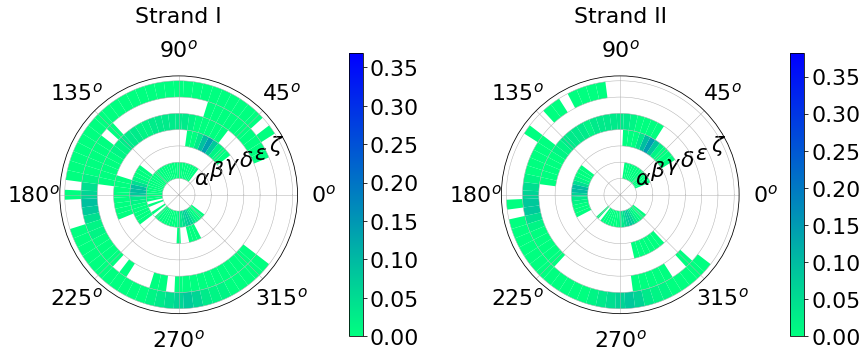

In [6]:
# Initialization of plot with resolution and figure size
fig = plt.figure(figsize=(14, 8))

# For large figure, use this
#fig = plt.figure(figsize=(18, 12), dpi=300)

# To adjust gaps and margins of subplots
fig.subplots_adjust(wspace=0.3)


##### Plot for first Strand #####
angels_type = ['alpha S1', 'beta S1', 'gamma S1', 'delta S1', 'epsilon S1', 'zeta S1']
label = [r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$', r'$\zeta$']

# Initialization of first axis or subplot
ax1 = plt.subplot(121, polar=True)
ax1.set_title('Strand I', fontsize=22, y = 1.2)

# to change properties of radial and circular grid-line from dashed to solid
ax1.grid(True, lw=0.5, linestyle='-')

# Extraction of angle data from DNA object
angles = []
for ang_name in angels_type:
    values = []
    # Extract all individual angles of 10th to 50th base-pairs
    for nbp in range(10,50):
        time, value = fdna.time_vs_parameter(ang_name, [nbp], merge=False, merge_method='mean')
        del time
        values = values + list(value)
    angles.append(np.array(values))

# Change list to numpy array
angles = np.asarray(angles)

# Plot angle wheel with "winter_r" colormap
colorbar = plot_angle_wheel(angles, colormap='winter_r', color_res=10, bin_size=5, 
                            ax= ax1, cb_pad=0.15, cb_shrink=0.65)

# Labeling wheel for each angle type
ax1.yaxis.set_ticklabels(label, fontsize=22)

##### To increase font-size of angle around perimeter
# Get angle label, which are present at the perimeter of wheel and change it to Degree
xticks = ax1.get_xticks()*180/np.pi
xlabel = []

# Convert angle to string and add Degree symbol
for x in xticks:
    xlabel.append('{0}$^o$' .format(int(x)))
    
# Change postion of angle label to remove any overlap
ax1.set_thetagrids(xticks, frac=1.22)

# At last change the fontsize
ax1.xaxis.set_ticklabels(xlabel, fontsize=22)

# Change the fontsize in colorbar
for text in colorbar.ax.get_yticklabels():
    text.set_fontsize(22)

# Clean memory
del angles
    
##### Plot for Second Strand #####
angels_type = ['alpha S2', 'beta S2', 'gamma S2', 'delta S2', 'epsilon S2', 'zeta S2']
label = [r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$', r'$\zeta$']

# Initialization of first axis
ax2 = plt.subplot(122, polar=True)
ax2.set_title('Strand II', fontsize=22, y = 1.2)

# to change properties of grid-line
ax2.grid(True, lw=0.5, linestyle='-')

# Extraction of angle data
angles = []
for ang_name in angels_type:
    values = []
    # Extract all angles of 10th to 50th base-pairs
    for nbp in range(10,50):
        time, value = fdna.time_vs_parameter(ang_name, [nbp], merge=False, merge_method='mean')
        del time
        values = values + list(value)
    angles.append(np.array(values))

# Change list to numpy array
angles = np.asarray(angles)

# Plot angle wheel with "winter_r" colormap
colorbar = plot_angle_wheel(angles, colormap='winter_r', color_res=10, bin_size=5, 
                            ax= ax2, cb_pad=0.15, cb_shrink=0.65)

# Labeling wheel for each angle type
ax2.yaxis.set_ticklabels(label, fontsize=22)

##### To increase font-size of angle around perimeter
# Get angle label, which are present at the perimeter of wheel and change it to Degree
xticks = ax2.get_xticks()*180/np.pi
xlabel = []

# Convert angle to string and add Degree symbol
for x in xticks:
    xlabel.append('{0}$^o$' .format(int(x)))
    
# Change postion of angle label to remove any overlap
ax2.set_thetagrids(xticks, frac=1.22)

# At last change the fontsize
ax2.xaxis.set_ticklabels(xlabel, fontsize=22)

# Change the fontsize in colorbar
for text in colorbar.ax.get_yticklabels():
    text.set_fontsize(22)

# Clean memory
del angles

plt.show()

### Torsional angle wheel for average angles of DNA segment

* To plot the angle wheel using "plot_angle_wheel" method.


* Properties of the plot could be changed using the mehtods of matplotlib.


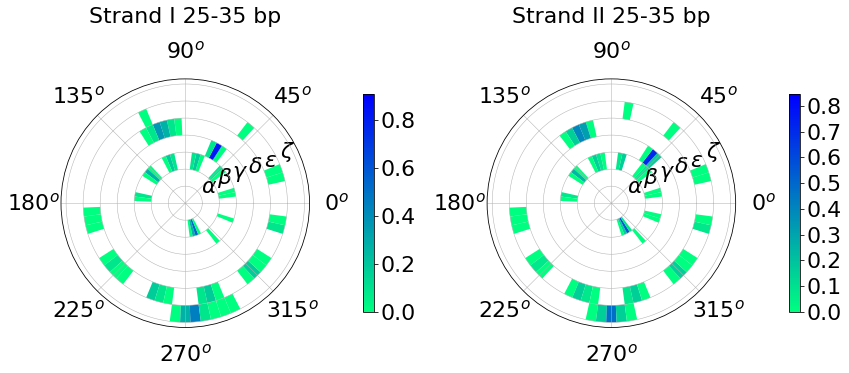

In [7]:
# Initialization of plot
fig = plt.figure(figsize=(14, 8))

# For large figure, use this
#fig = plt.figure(figsize=(18, 12), dpi=300)

fig.subplots_adjust(wspace=0.2)


##### Plot for first Strand #####
angels_type = ['alpha S1', 'beta S1', 'gamma S1', 'delta S1', 'epsilon S1', 'zeta S1']
label = [r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$', r'$\zeta$']

# Initialization of first axis
ax1 = plt.subplot(121, polar=True)
ax1.set_title('Strand I 25-35 bp', fontsize=22, y = 1.2)

# to change properties of grid-line
ax1.grid(True, lw=0.5, linestyle='-')

# Extraction of angle data
angles = []
for ang_name in angels_type:
    # To calculate the angle for a segment, angles are avereged over base-pairs
    time, value = fdna.time_vs_parameter(ang_name, [25, 35], merge=True, merge_method='mean')
    del time
    angles.append(value)

# Change list to numpy array
angles = np.asarray(angles)

# Plot angle wheel with "winter_r" colormap
colorbar = plot_angle_wheel(angles, colormap='winter_r', color_res=10, bin_size=5, 
                            ax= ax1, cb_pad=0.15, cb_shrink=0.5)

# Labeling wheel for each angle type
ax1.yaxis.set_ticklabels(label, fontsize=22)

##### To increase font-size of angle around perimeter
# Get angle label, which are present at the perimeter of wheel and change it to Degree
xticks = ax1.get_xticks()*180/np.pi
xlabel = []

# Convert angle to string and add Degree symbol
for x in xticks:
    xlabel.append('{0}$^o$' .format(int(x)))
    
# Change postion of angle label to remove any overlap
ax1.set_thetagrids(xticks, frac=1.22)

# At last change the fontsize
ax1.xaxis.set_ticklabels(xlabel, fontsize=22)

# Change the fontsize in colorbar
for text in colorbar.ax.get_yticklabels():
    text.set_fontsize(22)

# Clean memory
del angles
    
##### Plot for Second Strand #####
angels_type = ['alpha S2', 'beta S2', 'gamma S2', 'delta S2', 'epsilon S2', 'zeta S2']
label = [r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$', r'$\zeta$']

# Initialization of first axis
ax2 = plt.subplot(122, polar=True)
ax2.set_title('Strand II 25-35 bp', fontsize=22, y = 1.2)

# to change properties of grid-line
ax2.grid(True, lw=0.5, linestyle='-')

# Extraction of angle data
angles = []
for ang_name in angels_type:
    # To calculate the angle for a segment, angles are avereged over base-pairs
    time, value = fdna.time_vs_parameter(ang_name, [25, 35], merge=True, merge_method='mean')
    del time
    angles.append(value)

# Change list to numpy array
angles = np.asarray(angles)

# Plot angle wheel with "winter_r" colormap
colorbar = plot_angle_wheel(angles, colormap='winter_r', color_res=10, bin_size=5, 
                            ax= ax2, cb_pad=0.15, cb_shrink=0.5)

# Labeling wheel for each angle type
ax2.yaxis.set_ticklabels(label, fontsize=22)

##### To increase font-size of angle around perimeter
# Get angle label, which are present at the perimeter of wheel and change it to Degree
xticks = ax2.get_xticks()*180/np.pi
xlabel = []

# Convert angle to string and add Degree symbol
for x in xticks:
    xlabel.append('{0}$^o$' .format(int(x)))
    
# Change postion of angle label to remove any overlap
ax2.set_thetagrids(xticks, frac=1.22)

# At last change the fontsize
ax2.xaxis.set_ticklabels(xlabel, fontsize=22)

# Change the fontsize in colorbar
for text in colorbar.ax.get_yticklabels():
    text.set_fontsize(22)

# Clean memory
del angles

plt.show()

### Torsional angle wheel for average angles of segment of a bound and a unbound DNA

* To plot the angle wheel using "plot_angle_wheel" method.


* Here, torsion angles of unbound and bound DNA are compared. Note that data are sparse (only 1000 frames from 100 ns).



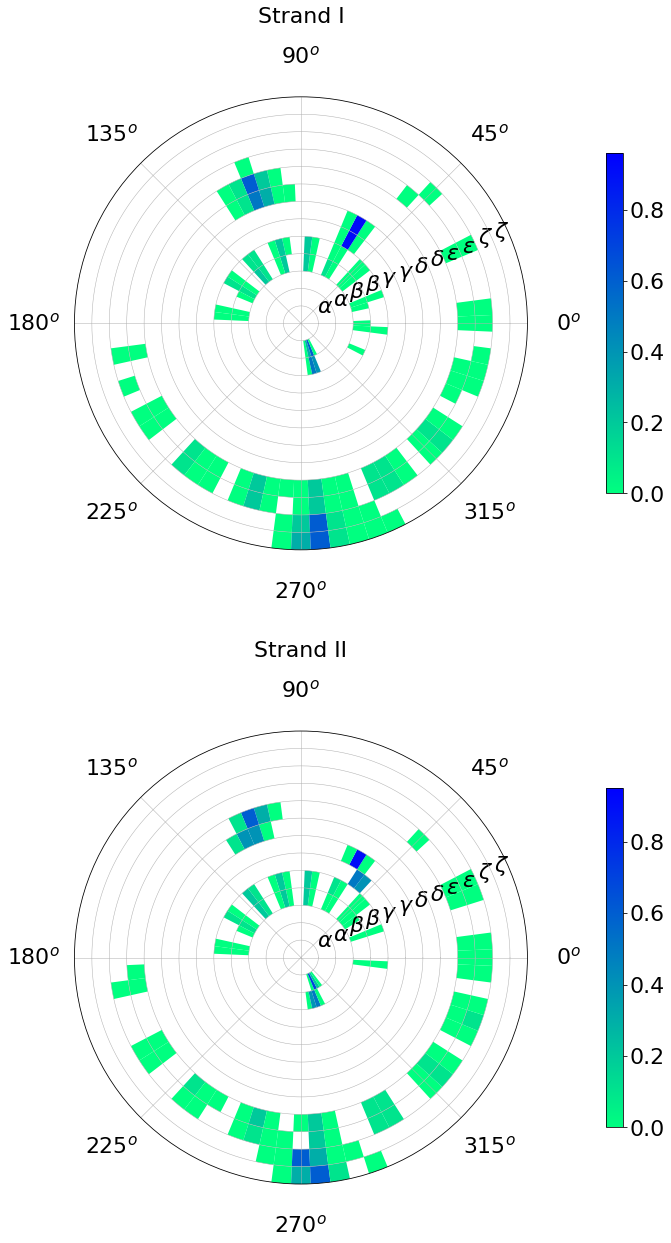

In [8]:
# Initialization of plot
fig = plt.figure(figsize=(14, 20))
fig.subplots_adjust(hspace=0.4)


##### Plot for first Strand #####
angels_type = ['alpha S1', 'beta S1', 'gamma S1', 'delta S1', 'epsilon S1', 'zeta S1']
label = [r'$\alpha$', r'$\alpha$', r'$\beta$', r'$\beta$', r'$\gamma$', r'$\gamma$', r'$\delta$', r'$\delta$', 
         r'$\epsilon$', r'$\epsilon$', r'$\zeta$', r'$\zeta$']

# Initialization of first axis
ax1 = plt.subplot(211, polar=True)
ax1.set_title('Strand I', fontsize=22, y = 1.15)

# to change properties of grid-line
ax1.grid(True, lw=0.5, linestyle='-')

# Extraction of angle data
angles = []
for ang_name in angels_type:
    # To calculate the angle for a segment, angles are avereged over base-pairs
    
    # Unbound DNA
    time, value = fdna.time_vs_parameter(ang_name, [25, 40], merge=True, merge_method='mean')
    del time
    angles.append(value)
    
    # Bound DNA
    time, value = pdna.time_vs_parameter(ang_name, [25, 40], merge=True, merge_method='mean')
    angles.append(value)

# Change list to numpy array
angles = np.asarray(angles)

# Plot angle wheel with "winter_r" colormap
colorbar = plot_angle_wheel(angles, colormap='winter_r', color_res=10, bin_size=5, 
                            ax=ax1, cb_pad=0.1, cb_shrink=0.75)

# Labeling wheel for each angle type
ax1.yaxis.set_ticks(range(1,13))
ax1.yaxis.set_ticklabels(label, fontsize=22)
plt.ylim(0,13)

##### To increase font-size of angle around perimeter
# Get angle label, which are present at the perimeter of wheel and change it to Degree
xticks = ax1.get_xticks()*180/np.pi
xlabel = []

# Convert angle to string and add Degree symbol
for x in xticks:
    xlabel.append('{0}$^o$' .format(int(x)))
    
# Change postion of angle label to remove any overlap
ax1.set_thetagrids(xticks, frac=1.18)

# At last change the fontsize
ax1.xaxis.set_ticklabels(xlabel, fontsize=22)

# Change the fontsize in colorbar
for text in colorbar.ax.get_yticklabels():
    text.set_fontsize(22)

# Clean memory
del angles    
    
##### Plot for Second Strand #####
angels_type = ['alpha S2', 'beta S2', 'gamma S2', 'delta S2', 'epsilon S2', 'zeta S2']
label = [r'$\alpha$', r'$\alpha$', r'$\beta$', r'$\beta$', r'$\gamma$', r'$\gamma$', r'$\delta$', r'$\delta$', 
         r'$\epsilon$', r'$\epsilon$', r'$\zeta$', r'$\zeta$']

# Initialization of first axis
ax2 = plt.subplot(212, polar=True)
ax2.set_title('Strand II', fontsize=22, y = 1.15)

# to change properties of grid-line
ax2.grid(True, lw=0.5, linestyle='-')

# Extraction of angle data
angles = []
for ang_name in angels_type:
    # To calculate the angle for a segment, angles are avereged over base-pairs
    
    # Unbound DNA
    time, value = fdna.time_vs_parameter(ang_name, [25, 40], merge=True, merge_method='mean')
    del time
    angles.append(value)
    
    # Bound DNA
    time, value = pdna.time_vs_parameter(ang_name, [25, 40], merge=True, merge_method='mean')
    angles.append(value)

# Change list to numpy array
angles = np.asarray(angles)

# Plot angle wheel with "PuRd" (purple-red) colormap
colorbar = plot_angle_wheel(angles, colormap='winter_r', color_res=10, bin_size=5, 
                            ax=ax2, cb_pad=0.1, cb_shrink=0.75)

# Labeling wheel for each angle type
ax2.yaxis.set_ticks(range(1,13))
ax2.yaxis.set_ticklabels(label, fontsize=22)
plt.ylim(0,13)

##### To increase font-size of angle around perimeter
# Get angle label, which are present at the perimeter of wheel and change it to Degree
xticks = ax2.get_xticks()*180/np.pi
xlabel = []

# Convert angle to string and add Degree symbol
for x in xticks:
    xlabel.append('{0}$^o$' .format(int(x)))
    
# Change postion of angle label to remove any overlap
ax2.set_thetagrids(xticks, frac=1.18)

# At last change the fontsize
ax2.xaxis.set_ticklabels(xlabel, fontsize=22)

# Change the fontsize in colorbar
for text in colorbar.ax.get_yticklabels():
    text.set_fontsize(22)

# Clean memory
del angles
    
plt.show()